In [ ]:
# Analysis

# Rural Areas had less rides of Pyber ride sharing, and it appears the average fare was slighly higher 
# compared to suburban and urban areas. This could potentially be explained by a lack of pyber demand in 
# lower income rural areas where fares could be potentially higher due to longer distances between 
# destinations.

# The number of drivers generally increase with population density with rural areas having the 
# least number of drivers per city and urban areas having generally the most. Again, this is an obvious 
# function of increased in more densly populated areas.

# There appears to be a negative correlation between the number of rides and the average fare. One possible 
# explanation could be the relationship between population density and the proximity density of urban 
# landscapes with respect to housing, shopping and amenities. More people take omre rides but for shorter 
# average distances.

In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [4]:
# File to Load (Remember to change these)
cty_data = 'data/city_data.csv'
ryd_data = 'data/ride_data.csv'

# Read the City and Ride Data
cty_data = pd.read_csv('./data/city_data.csv')
ryd_data = pd.read_csv('./data/ride_data.csv')

#Drop duplicates in city data
cty_data = cty_data.drop_duplicates('city', keep = 'first')

#Combine the data into a single dataset
combo_data = pd.merge(cty_data, ryd_data, on='city')

# Display the data table for preview
combo_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [5]:
#group be city name
cty_grp = combo_data.groupby('city')

# * Average Fare Per City
avg_cty_fare = cty_grp.mean()['fare']

#Total rides by city
tot_cty_ryds = cty_grp['ride_id'].count()

# num of drivers
tot_drvrs_cty = cty_grp.mean()['driver_count']

# city type data
cty_typ = cty_data.set_index('city')['type']

In [6]:
# Creating a DataFrame for city data
bubl_plt = pd.DataFrame({'Avg City Fare': avg_cty_fare, 
                           'Ride Numbers': tot_cty_ryds, 
                           'Driver Numbers': tot_drvrs_cty, 
                           'City Type': cty_typ
                          })


In [7]:
#separated dfs for city categories
rural = bubl_plt[bubl_plt['City Type'] == 'Rural']
suburban = bubl_plt[bubl_plt['City Type'] == 'Suburban']
urban = bubl_plt[bubl_plt['City Type'] == 'Urban']

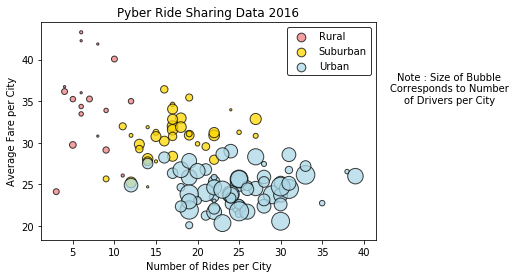

In [6]:
# three scatter plots for each city type
plt.scatter(rural['Ride Numbers'], rural['Avg City Fare'], s = rural['Driver Numbers']*5, 
            color = 'lightcoral', edgecolor = 'black', label = 'Rural', alpha = .75)

plt.scatter(suburban['Ride Numbers'], suburban['Avg City Fare'], s = suburban['Driver Numbers']*5, 
            color = 'gold', edgecolor = 'black', label = 'Suburban', alpha = .75)

plt.scatter(urban['Ride Numbers'], urban['Avg City Fare'], s = urban['Driver Numbers']*5, 
            color = 'lightblue', edgecolor = 'black', label = 'Urban', alpha = .75)


#print scatter plot
plt.title('Pyber Ride Sharing Data 2016')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')
plt.figtext(1.07, 0.6,"Note : Size of Bubble\n Corresponds to Number\n of Drivers per City", wrap=True, 
            horizontalalignment='center', fontsize=10)

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()

## Pie Charts

In [8]:
#Calculate Ride Variables for all plots

# * % of Total Fares by City Type
tot_fare_type = combo_data.groupby('type')['fare'].sum()

# * % of Total Rides by City Type
tot_ryd_type = combo_data.groupby('type')['date'].count()

# * % of Total Drivers by City Type
tot_drvr_type = combo_data.groupby('type')['driver_count'].count()

## Total Fares by City Type

In [9]:
#Create labes and colors
fare_labels = ['Rural', 'Suburban', 'Urban']
colors = ["yellow","yellowgreen","lightskyblue"]
explode = (0,0, 0.2)

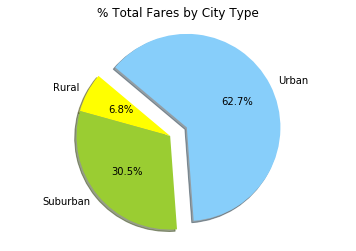

In [10]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(tot_fare_type, explode=explode, labels=fare_labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Create title
plt.title("% Total Fares by City Type")

# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PyPies.png")

plt.show()

## Total Rides by City Type

In [11]:
#Create labes and colors
fare_labels = ['Rural', 'Suburban', 'Urban']
colors = ["yellow","yellowgreen","lightskyblue"]
explode = (0,0, 0.2)

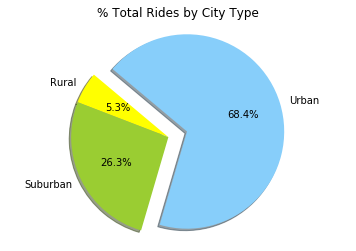

In [12]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(tot_ryd_type, explode=explode, labels=fare_labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Create title
plt.title('% Total Rides by City Type')

# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PyPies.png")

plt.show()

## Total Drivers by City Type

In [15]:
#Create labes and colors
fare_labels = ['Rural', 'Suburban', 'Urban']
colors = ["yellow","yellowgreen","lightskyblue"]
explode = (0,0, 0.2)

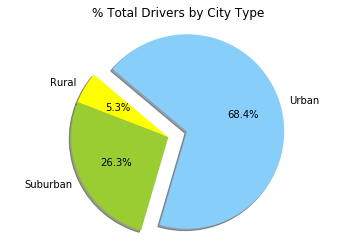

In [16]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(tot_drvr_type, explode=explode, labels=fare_labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Create title
plt.title('% Total Drivers by City Type')

# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PyPies.png")

plt.show()